In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn.metrics as skmetrics
from tqdm import tqdm

In [54]:
data = pd.read_csv('train-7.csv')

In [55]:
data['Datetime'] = pd.to_datetime(data['Datetime'])#, format='%Y-%m-%d')
# monthly
davg_df2 = data.groupby(pd.Grouper(freq='D', key='Datetime')).mean()
# daily
#davg_df2 = df2.groupby(pd.Grouper(freq='D', key='DATE')).mean()

In [56]:
davg_df2

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,366.223561,25.528849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.727612,74.042120,NaN,NaN,276.727612,5.263797
2018-01-02 00:00:00+00:00,462.550740,25.357526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.105603,93.555723,NaN,NaN,274.105603,5.390719
2018-01-03 00:00:00+00:00,454.417752,24.379363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.369130,91.627843,NaN,NaN,286.369130,5.295225
2018-01-04 00:00:00+00:00,369.952190,24.912347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.445471,74.360621,NaN,NaN,284.445471,5.094994
2018-01-05 00:00:00+00:00,319.446595,23.535679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.013293,64.366148,NaN,NaN,292.013293,4.915224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11 00:00:00+00:00,466.289248,28.276232,44.059155,0.482881,0.934002,0.934002,64.106761,56.921031,1163.017505,67.939614,67.174603,38.635532,39.955577,183.729298,71.852813,10.420975,2.030612,183.729298,5.385570
2020-03-12 00:00:00+00:00,570.315539,29.094133,44.476550,1.206977,1.629283,1.629283,64.051326,56.194520,1217.638162,70.008635,69.288543,39.978688,40.757739,180.773250,84.040654,10.931663,2.033333,180.773250,5.693483
2020-03-13 00:00:00+00:00,619.637333,30.088163,45.903233,2.168904,2.609776,2.609776,65.348205,57.663415,1213.959374,72.745844,72.096953,39.562485,41.600482,187.621975,99.693231,10.884414,2.059259,187.621975,5.765318


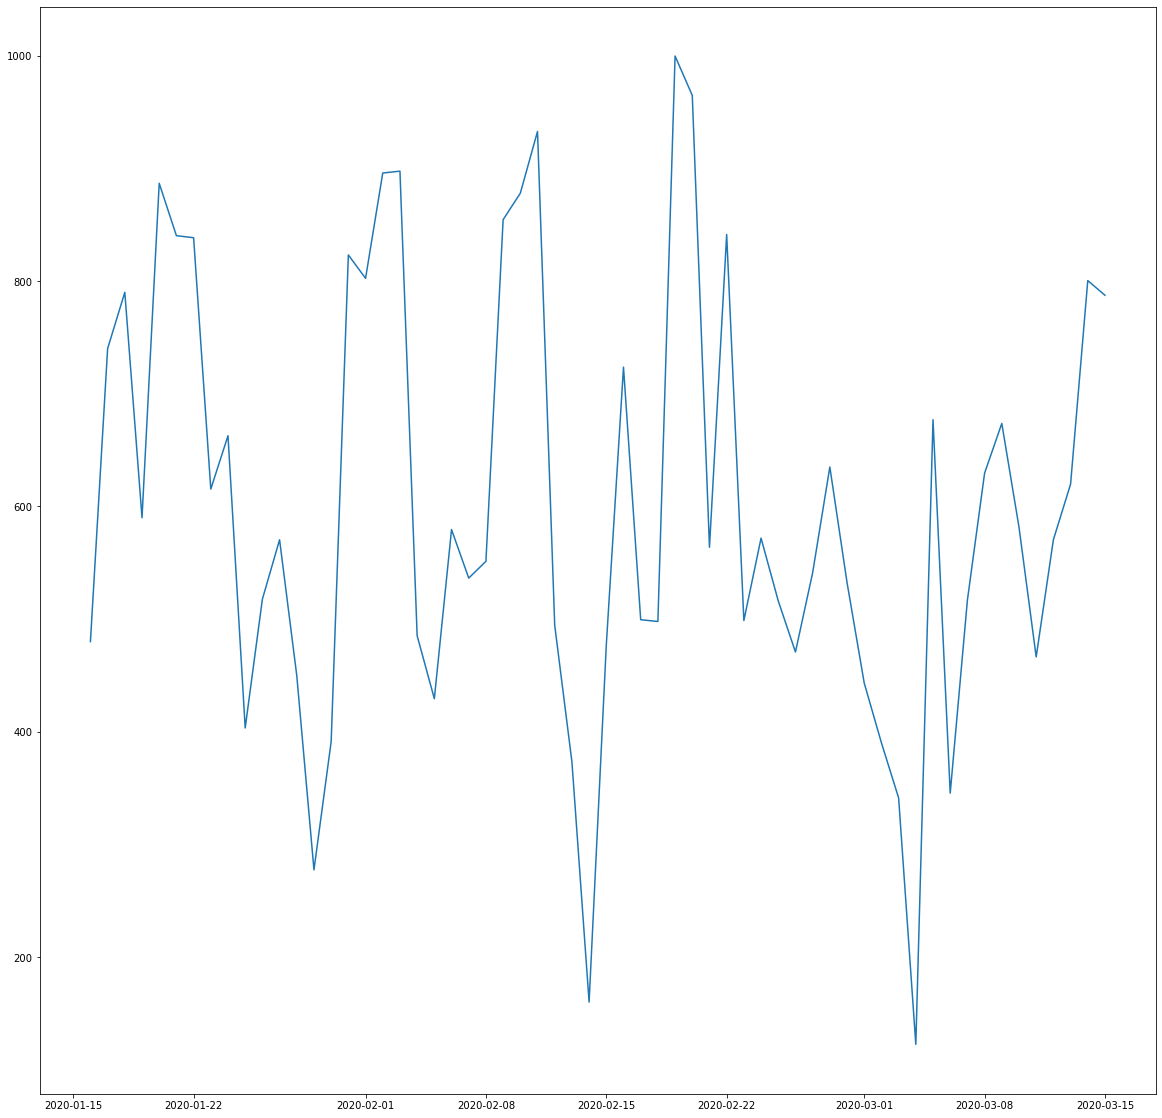

In [103]:
fig, ax = plt.subplots(figsize = (20,20))
plt.plot(davg_df2['ActivePower'][745:])

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


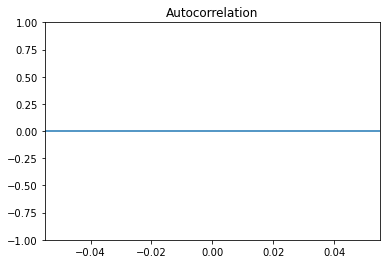

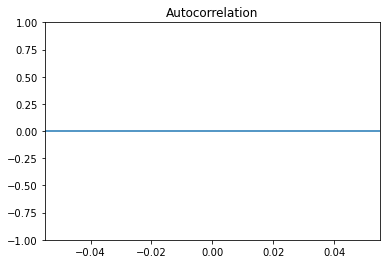

In [43]:
plot_acf(davg_df2['ActivePower'], lags=300)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


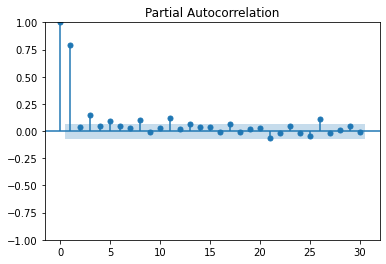

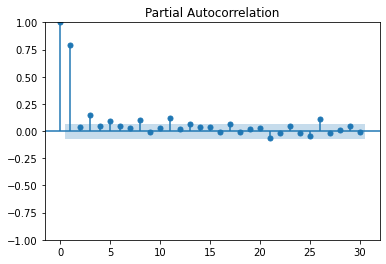

In [8]:
plot_pacf(davg_df2['ActivePower'], lags=30)

In [20]:
davg_df2

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,27100.543546,1889.134802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18540.750000,5479.116889,0.000000,0.0,18540.750000,389.520971
2018-01-02 00:00:00+00:00,48105.276969,2637.182675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24395.398701,9729.795208,0.000000,0.0,24395.398701,560.634808
2018-01-03 00:00:00+00:00,44078.521927,2364.798205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25486.852534,8887.900759,0.000000,0.0,25486.852534,513.636809
2018-01-04 00:00:00+00:00,50683.449963,3412.991486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36124.574860,10187.405099,0.000000,0.0,36124.574860,698.014246
2018-01-05 00:00:00+00:00,30986.319719,2282.960836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26573.209632,6243.516355,0.000000,0.0,26573.209632,476.776755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11 00:00:00+00:00,45696.346270,2771.070737,4317.797164,47.322351,91.532186,91.532186,6282.462549,5578.261070,113975.715460,6658.082134,6583.111115,3786.282164,3915.646534,18005.471176,7041.575632,1021.255596,199.0,18005.471176,527.785900
2020-03-12 00:00:00+00:00,51328.398473,2618.471958,4002.889522,108.627902,146.635433,146.635433,5764.619311,5057.506816,109587.434617,6300.777176,6235.968838,3598.081879,3668.196549,16269.592499,7563.658841,983.849657,183.0,16269.592499,512.413426
2020-03-13 00:00:00+00:00,83651.039923,4061.901962,6196.936487,292.801991,352.319696,352.319696,8822.007724,7784.561052,163884.515434,9820.688943,9733.088721,5340.935419,5616.065125,25328.966595,13458.586248,1469.395847,278.0,25328.966595,778.317955


# train test split

In [57]:
# train = davg_df2['ActivePower'][:655]
# test = davg_df2['ActivePower'][655:]
train = davg_df2['ActivePower'][:790]
test = davg_df2['ActivePower'][790:]

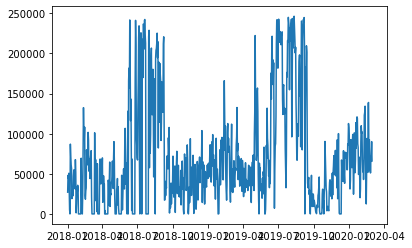

In [22]:
plt.plot(train)

# Sarima

In [ ]:
def evaluate_arima_model_rmse(X, arima_order, train_size_coe, stepSize, prediction_Size):
    train_size = int(len(X) * train_size_coe)
    train, test = X[0:train_size], X[train_size:] #initial split of train and test
    
    rmses = list()
    for t in tqdm(range(0, len(test), stepSize)):
        model = ARIMA(X[:train_size+t], order=arima_order) #each step: rolling one step forward to update the train set
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        mse = mean_squared_error(yhat, test[t:t+prediction_Size])
        rmse = np.sqrt(mse)
        rmses.append(rmse) #store prediction
        # calculate out of sample error
    re = np.mean(rmses)
    return re

def evaluate_models_rmse(dataset, p_values, d_values, q_values):
    result = []
    best_rmse, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                
                rmse= evaluate_arima_model_rmse(dataset, order, 145/195, 5, 5)
                result.append((order, rmse))
                if rmse < best_rmse:
                    best_rmse, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))
    #return result

In [ ]:
def evaluate_sarima_model_mae(X, trend_order, seasonal_order, train_size_coe, stepSize, prediction_Size):
    train_size = int(len(X) * train_size_coe)
    train, test = X[0:train_size], X[train_size:] #initial split of train and test
    
    rmses = list()
    for t in range(0, len(test), stepSize):#tqdm(range(0, len(test), stepSize)):
        model = sm.tsa.statespace.SARIMAX(X[:train_size+t], order=trend_order, seasonal_order=seasonal_order, initialization='approximate_diffuse')
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        mse = mean_absolute_error(yhat, test[t:t+prediction_Size])
        rmse = np.sqrt(mse)
        rmses.append(rmse) #store prediction
        # calculate out of sample error
    re = np.mean(rmses)
    return re

def evaluate_models_rmse(dataset, p_values, d_values, q_values, P_values, Q_values, D_values, m):
    result = []
    best_rmse, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            trend_order = (p,d,q)
                            seasonal_order = (P,D,Q,m)
                            cfg = [(p,d,q), (P,D,Q,m)]
                            rmse= evaluate_sarima_model_mae(dataset, trend_order, seasonal_order, train_size_coe, stepSize, prediction_Size)
                            result.append((trend_order, seasonal_order, rmse))
                if rmse < best_rmse:
                    best_rmse, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))

In [243]:
def evaluate_sarima_model_rmse(X, trend_order, seasonal_order, train_size_coe, stepSize, prediction_Size):
    train_size = int(len(X) * train_size_coe)
    train, test = X[0:train_size], X[train_size:] #initial split of train and test
    
    mses = list()
    for t in tqdm(range(0, len(test) - prediction_Size, stepSize)):#range(0, len(test), stepSize):#tqdm(range(0, len(test), stepSize)):
        #print(t)
        model = sm.tsa.statespace.SARIMAX(X[:train_size+t], order=trend_order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        # mse = mean_squared_error(yhat, test[t:t+prediction_Size])
        mse = skmetrics.r2_score(yhat, test[t:t+prediction_Size])
        #rmse = np.sqrt(mse)
        mses.append(mse) #store prediction
        #calculate out of sample error
    re = np.mean(mses)
    return re

def evaluate_models_rmse(dataset, trend_seasonal, m):
    result = []
    best_rmse, best_cfg = float("inf"), None
    # for p in p_values:
    #     for d in d_values:
    #         for q in q_values:
    #             for P in P_values:
    #                 for D in D_values:
    #                     for Q in Q_values:
    for tc in trend_seasonal:
        trend_order = tc[0]
        seasonal_order = tc[1]
        cfg = tc
        rmse= evaluate_sarima_model_rmse(dataset, trend_order, seasonal_order, 565/655, 15, 15)
        result.append((cfg, rmse))
        if rmse < best_rmse:
            best_rmse, best_cfg = rmse, cfg
        #print('ARIMA%s RMSE=%.3f' % (cfg,rmse))
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))

In [11]:
len(train)-6*15

565

In [247]:
trend_seasonal = [[(1,0,0), (1,1,1,10)], [(1,0,1), (1,1,1,10)], [(1,1,1), (1,1,1,10)], [(2,0,0), (1,1,1,10)], [(2,0,1), (1,1,1,10)], [(2,1,1), (1,1,1,10)]
                 , [(2,0,0), (1,0,1,10)]]
evaluate_models_rmse(train, trend_seasonal, 10)

  0%|                                                           | 0/7 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 14%|███████▎                                           | 1/7 [00:01<00:10,  1.68s/it]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 43%|█████████████████████▊                             | 3/7 [00:04<00:06,  1.64s/it]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  0%|                                                           | 0

Best ARIMA[(2, 0, 0), (1, 0, 1, 10)] RMSE=-78.801


In [244]:
evaluate_sarima_model_rmse(train, (0,1,0), (0,1,1,10), 565/655, 15, 15)

100%|███████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


-97.1002849121608

In [ ]:
def evaluate_arima_model_rmse(X, arima_order, train_size_coe, stepSize, prediction_Size):
    train_size = int(len(X) * train_size_coe)
    train, test = X[0:train_size], X[train_size:] #initial split of train and test
    
    rmses = list()
    for t in tqdm(range(0, len(test), stepSize)):
        model = ARIMA(X[:train_size+t], order=arima_order) #each step: rolling one step forward to update the train set
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        mse = mean_squared_error(yhat, test[t:t+prediction_Size])
        rmse = np.sqrt(mse)
        rmses.append(rmse) #store prediction
        # calculate out of sample error
    re = np.mean(rmses)
    return re

In [25]:
790-15*4

730

In [26]:
365*2

730

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
best_mse = np.inf

for trend in ['add', 'mul', None]:
    for seasonal in ['add', 'mul', None]:
        mses = []
        for t in range(0, 60, 15):
            if trend == 'add':
                for damped_trend in [True, False]:
                    model = ExponentialSmoothing(train[:730+t], trend=trend, seasonal=seasonal, seasonal_periods=365, damped_trend=damped_trend).fit()
                    pred = model.forecast(15)
                    mse = mean_squared_error(pred, train[730+t:730+t+15])
                    mses.append(mse)
            else:
                for damped_trend in [False]:
                    model = ExponentialSmoothing(train[:730+t], trend=trend, seasonal=seasonal, seasonal_periods=365, damped_trend=damped_trend).fit()
                    pred = model.forecast(15)
                    mse = mean_squared_error(pred, train[730+t:730+t+15])
                    mses.append(mse)
        mse = np.mean(mses)
        if mse < best_mse:
            best_mse = mse
            tren = trend
            s = seasonal
            d = damped_trend
print(tren, s, d, mse)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to co

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

# Exponential Smoothing no 1

In [493]:
model = ExponentialSmoothing(train[745:776], trend=None, seasonal='add', seasonal_periods=10, damped_trend=False).fit()
pred = model.forecast(14)
mse = skmetrics.r2_score(pred, train[776:790])
rmse = np.sqrt(mean_squared_error(pred, train[776:790]))

In [227]:
np.array(zip(train[776:790].index, [train[776:790].mean()]*14))

array(<zip object at 0x7fd553dde400>, dtype=object)

In [221]:
[train[776:790].mean()]*14

[632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561,
 632.5003026390561]

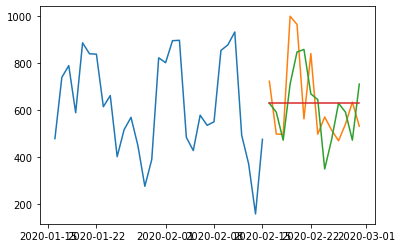

In [228]:
plt.plot(train[745:776])
plt.plot(train[776:790])
plt.plot(pred)
plt.plot(train[776:790].index, [train[776:790].mean()]*14)

In [490]:
mse

-0.46043025242087676

In [491]:
rmse

166.82073532596345

In [465]:
full = davg_df2['ActivePower']

In [480]:
pred - range(0,30,2)

2020-03-16 00:00:00+00:00    489.122942
2020-03-17 00:00:00+00:00    576.431448
2020-03-18 00:00:00+00:00    543.346676
2020-03-19 00:00:00+00:00    578.972031
2020-03-20 00:00:00+00:00    689.110411
2020-03-21 00:00:00+00:00    666.507060
2020-03-22 00:00:00+00:00    584.517978
2020-03-23 00:00:00+00:00    574.983957
2020-03-24 00:00:00+00:00    556.751149
2020-03-25 00:00:00+00:00    551.116643
2020-03-26 00:00:00+00:00    469.122942
2020-03-27 00:00:00+00:00    556.431448
2020-03-28 00:00:00+00:00    523.346676
2020-03-29 00:00:00+00:00    558.972031
2020-03-30 00:00:00+00:00    669.110411
Freq: D, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'label'

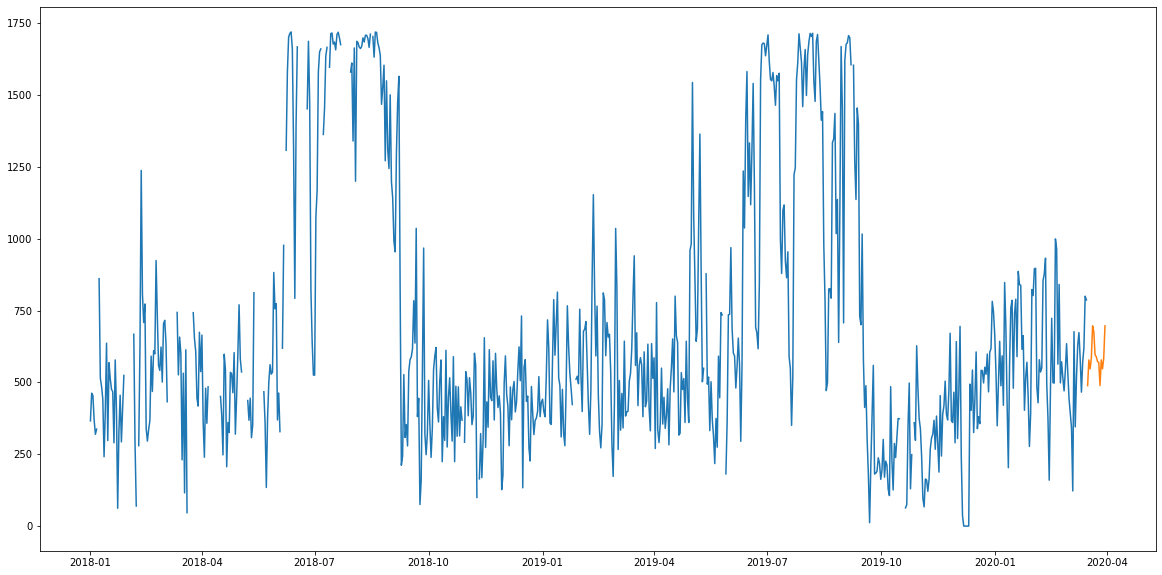

In [571]:
model = ExponentialSmoothing(full[-90:], trend=None, seasonal='add', seasonal_periods=10, damped_trend=False).fit()
pred_ = model.forecast(15)#-range(0,15*5,5)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(full)
#plt.plot(pred)
ax.plot(pred_)
plt.savefig('ES.png')

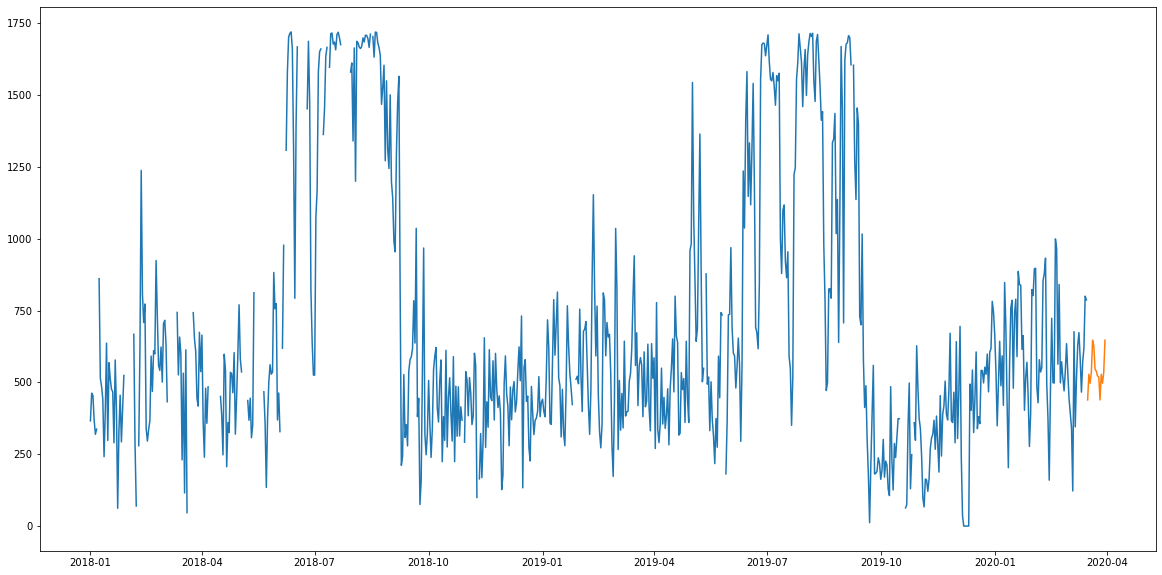

In [651]:
model = ExponentialSmoothing(full[-90:], trend=None, seasonal='add', seasonal_periods=10, damped_trend=False).fit()
pred_ = model.forecast(15)-50
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(full)
#plt.plot(pred)
ax.plot(pred_)
plt.savefig('ESone.png')

In [640]:
pred_

2020-03-16 00:00:00+00:00    489.122942
2020-03-17 00:00:00+00:00    578.431448
2020-03-18 00:00:00+00:00    547.346676
2020-03-19 00:00:00+00:00    584.972031
2020-03-20 00:00:00+00:00    697.110411
2020-03-21 00:00:00+00:00    676.507060
2020-03-22 00:00:00+00:00    596.517978
2020-03-23 00:00:00+00:00    588.983957
2020-03-24 00:00:00+00:00    572.751149
2020-03-25 00:00:00+00:00    569.116643
2020-03-26 00:00:00+00:00    489.122942
2020-03-27 00:00:00+00:00    578.431448
2020-03-28 00:00:00+00:00    547.346676
2020-03-29 00:00:00+00:00    584.972031
2020-03-30 00:00:00+00:00    697.110411
Freq: D, dtype: float64

In [516]:
tr = train.fillna(train.mean())

In [517]:
tr = np.where(tr <= 0, tr.mean(), tr)

In [519]:
tr == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [525]:
model = ExponentialSmoothing(tr[-90:], trend=None, seasonal='mul', seasonal_periods=10, damped_trend=False).fit()
pred_ = model.forecast(15)#-range(0,15*5,5)
np.sqrt(mean_squared_error(test, pred_))
# plt.plot(full[-90:])
# #plt.plot(pred)
# plt.plot(pred_)

240.4260360952212

In [656]:
model = ExponentialSmoothing(tr[-90:], trend=None, seasonal='add', seasonal_periods=10, damped_trend=False).fit()
pred_ = model.forecast(15)-50#-range(0,15*5,5)
np.sqrt(mean_squared_error(test, pred_))

217.74167530598905

In [539]:
model = ExponentialSmoothing(tr[-90:], trend=None, seasonal='mul', seasonal_periods=10, damped_trend=False).fit()
pred_ = model.forecast(15)#-range(0,15*5,5)
np.sqrt(mean_squared_error(test, pred_))

240.4260360952212

# Exponential Smoothing no 2

In [551]:
model = ExponentialSmoothing(train[745:790], trend=None, seasonal='add', seasonal_periods=10, damped_trend=False).fit()
pred = model.forecast(15)
mse = skmetrics.r2_score(pred, test)
rmse = np.sqrt(mean_squared_error(pred, test))

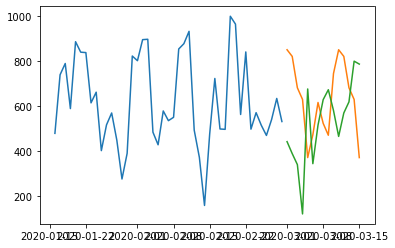

In [552]:
plt.plot(train[745:790])
plt.plot(pred)
plt.plot(test)

In [553]:
rmse

298.9739564743666

In [250]:
mse

-2.504093486654266

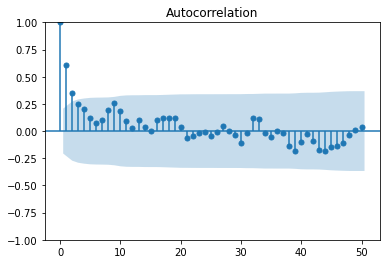

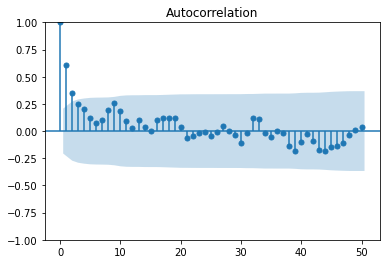

In [239]:
plot_acf(train[700:790], lags=50)

In [234]:
mse

-2.504093486654266

# Mean Model

In [343]:
tr = train.fillna(train.mean())

In [190]:
skmetrics.mean_squared_error(pred, train[776:790])

27829.157734695153

In [79]:
y_bar = train.values[745:775].mean()

In [81]:
pr = [y_bar]*15

In [464]:
np.sqrt(skmetrics.mean_squared_error(pr, train.values[775:790]))

171.3131432980252

In [84]:
pr

[624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513,
 624.8059307701513]

In [86]:
train.values[775:790].mean()

622.1207199484645

In [667]:
y_bar = train.values[-90:].mean()
pr = [y_bar]*15
np.sqrt(skmetrics.mean_squared_error(test, pr))

177.4625812641636

# ARIMA

In [627]:
def hwq1(p, d, q):
    X = tr#davg_df2['ActivePower']
    arima_order = (p,d,q)
    train_size_coe = 145/195
    stepSize = 15
    prediction_Size = 15
    train_size = 30#int(len(X) * train_size_coe)
    train, test = X[-105:-105+train_size], X[-105+train_size:] #initial split of train and test

    rmses = list()
    for t in tqdm(range(0, len(test), stepSize)):
        model = ARIMA(train[:train_size+t], order=arima_order) #each step: rolling one step forward to update the train set
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        mse = mean_squared_error(yhat, test[(t):t+prediction_Size])
        rmse = np.sqrt(mse)
        rmses.append(rmse) #store prediction
            # calculate out of sample error
    re = np.mean(rmses)
    return re

def evaluate(p_val, q_val, d_val):
    result = []
    best_rmse, best_cfg = float("inf"), None
    p_values = p_val
    q_values = q_val
    d_values = d_val
    for p in p_values:
        for q in q_values:
            for d in d_values:
                rmse = hwq1(p, d, q)
                order = (p, d, q)
                result.append((order, rmse))
                if rmse < best_rmse:
                    best_rmse, best_cfg = rmse, order
                #print('ARIMA%s RMSE=%.3f' % (order,rmse))
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))

In [607]:
120-60

60

In [628]:
evaluate(range(2), range(5), range(3))

  0%|                                                           | 0/5 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting 

Best ARIMA(1, 2, 4) RMSE=198.105


NameError: name 'best_cfg' is not defined

In [425]:
model = ARIMA(train[743:773], order=(0,1,0)) #each step: rolling one step forward to update the train set
model_fit = model.fit()
yhat = np.asanyarray(model_fit.forecast(steps=17)) #predict one step
mse = mean_squared_error(yhat, train[773:790])

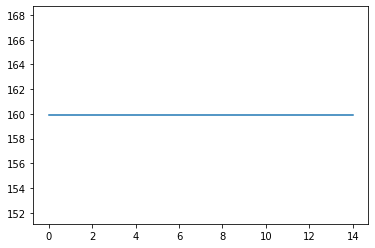

In [428]:
plt.plot(yhat)

In [590]:
model = ARIMA(train[-30:-15], order=(4,0,4)) #each step: rolling one step forward to update the train set
model_fit = model.fit()
yhat = np.asanyarray(model_fit.forecast(steps=15)) #predict one step
mse = np.sqrt(mean_squared_error(yhat, train[-15:]))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


LinAlgError: Schur decomposition solver error.

In [658]:
mse

178.670843760034

In [657]:
model = ARIMA(train[-30:], order=(0,1,1)) #each step: rolling one step forward to update the train set
model_fit = model.fit()
yhat = np.asanyarray(model_fit.forecast(steps=15)) #predict one step
mse = np.sqrt(mean_squared_error(test, yhat))

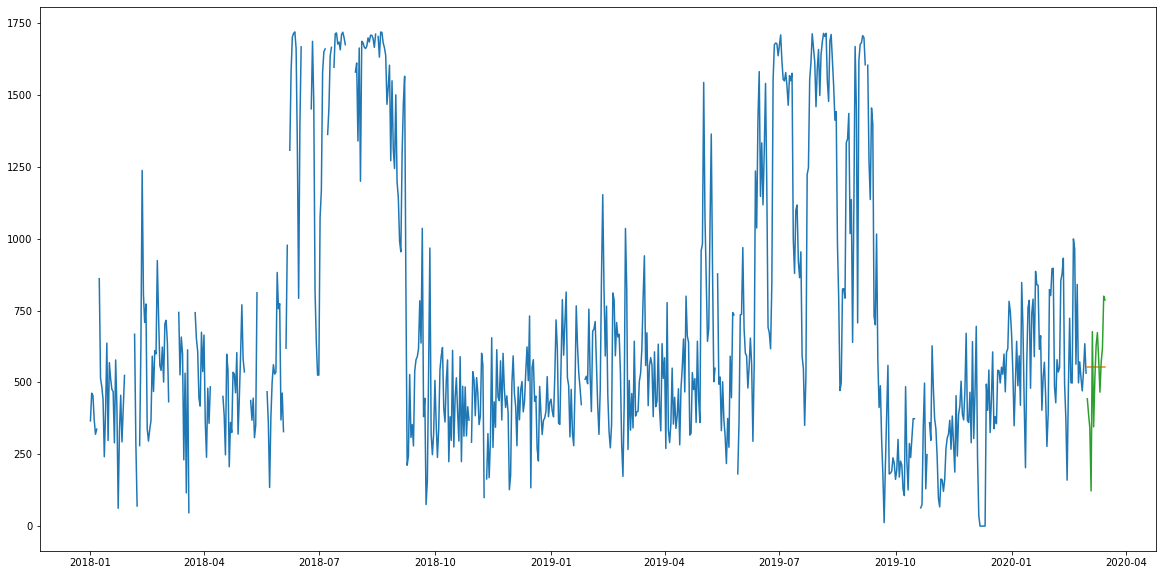

In [635]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train)
ax.plot(test.index, yhat)
ax.plot(test)
#plt.savefig

In [636]:
model = ARIMA(full[-30:], order=(0,1,1)) #each step: rolling one step forward to update the train set
model_fit = model.fit()
yhat = np.asanyarray(model_fit.forecast(steps=15)) #predict one step
mse = np.sqrt(mean_squared_error(test, yhat))

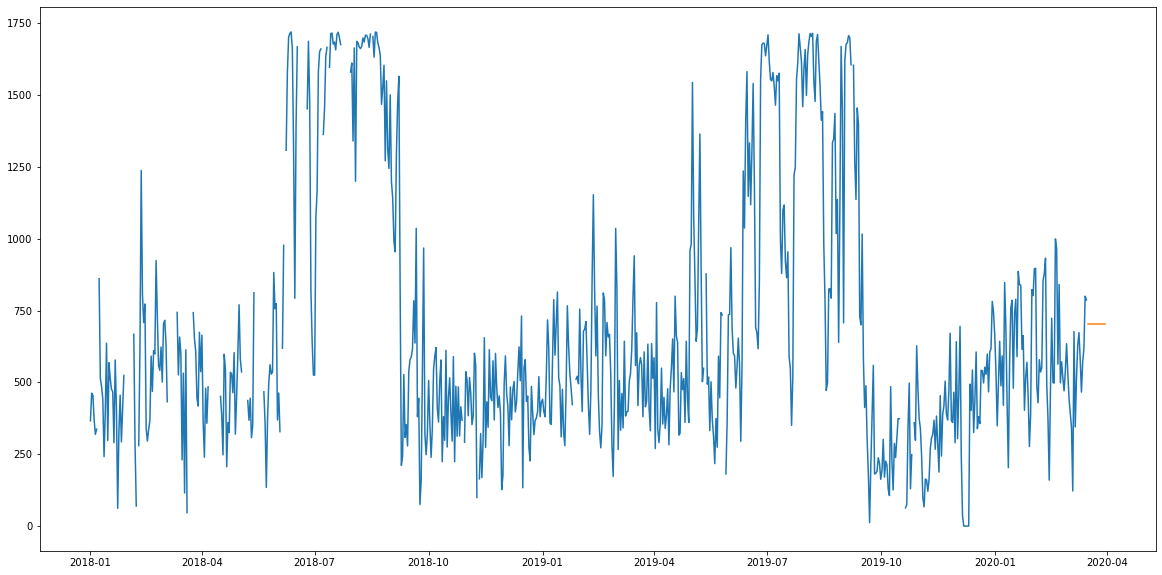

In [643]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(full)
ax.plot(pred_.index, yhat)
#ax.plot(test)
plt.savefig('arima.png')

In [639]:
test

Datetime
2020-03-01 00:00:00+00:00    443.058496
2020-03-02 00:00:00+00:00    390.027361
2020-03-03 00:00:00+00:00    341.133560
2020-03-04 00:00:00+00:00    122.348957
2020-03-05 00:00:00+00:00    676.893151
2020-03-06 00:00:00+00:00    345.379836
2020-03-07 00:00:00+00:00    516.674962
2020-03-08 00:00:00+00:00    629.447133
2020-03-09 00:00:00+00:00    673.519002
2020-03-10 00:00:00+00:00    581.532630
2020-03-11 00:00:00+00:00    466.289248
2020-03-12 00:00:00+00:00    570.315539
2020-03-13 00:00:00+00:00    619.637333
2020-03-14 00:00:00+00:00    800.312824
2020-03-15 00:00:00+00:00    787.305117
Freq: D, Name: ActivePower, dtype: float64

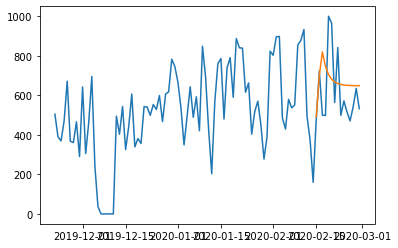

In [456]:
plt.plot(train[-100:])
plt.plot(train[-15:].index, yhat)

In [459]:
model = ARIMA(train[-15:], order=(1,0,3)) #each step: rolling one step forward to update the train set
model_fit = model.fit()
yhat = np.asanyarray(model_fit.forecast(steps=15))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


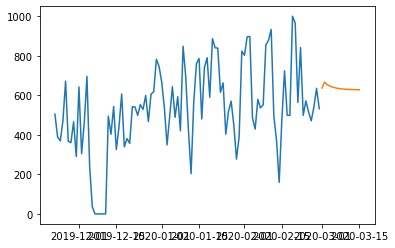

In [462]:
plt.plot(train[-100:])
plt.plot(test.index, yhat)

In [145]:
from statsmodels.tsa.statespace.arima import ARIMA

ModuleNotFoundError: No module named 'statsmodels.tsa.statespace.arima'

In [146]:
from statsmodels.tsa.arima.model import ARIMA

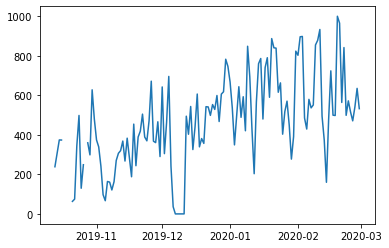

In [255]:
plt.plot(train[650:790])

# Exponential Smoothing no 3

In [289]:
model = ExponentialSmoothing(t[660:790], trend='add', seasonal='add', seasonal_periods=10, damped_trend=False).fit()
pred = model.forecast(15)
mse = skmetrics.mean_squared_error(pred, test)

In [291]:
np.sqrt(mse)

187.9593734740258

In [311]:
model = ARIMA(train[660:790], order=(0,1,0)) #each step: rolling one step forward to update the train set
model_fit = model.fit()
yhat = np.asanyarray(model_fit.forecast(steps=15)) #predict one step
mse = np.sqrt(mean_squared_error(yhat, test))

In [312]:
yhat

array([532.32177258, 532.32177258, 532.32177258, 532.32177258,
       532.32177258, 532.32177258, 532.32177258, 532.32177258,
       532.32177258, 532.32177258, 532.32177258, 532.32177258,
       532.32177258, 532.32177258, 532.32177258])

In [313]:
mse

177.19941818706357

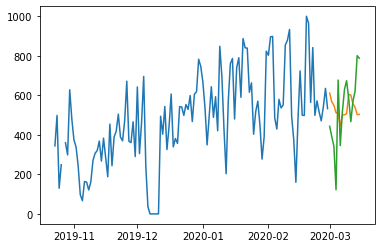

In [287]:
plt.plot(train[660:790])
plt.plot(pred)
plt.plot(test)

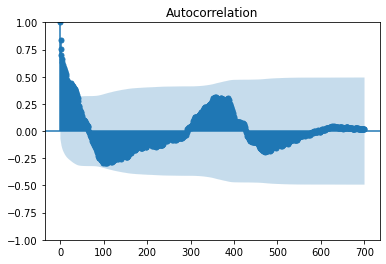

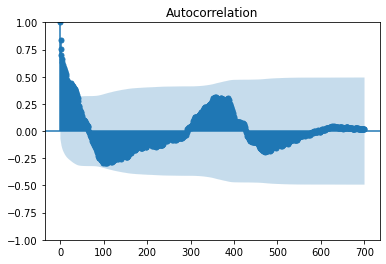

In [276]:
plot_acf(t, lags=700)

# Exponential Smoothing Cross Validation

In [331]:
tr = np.where(tr<=0, tr.mean(), tr)

In [330]:
tr

array([3.66223561e+02, 4.62550740e+02, 4.54417752e+02, 3.69952190e+02,
       3.19446595e+02, 3.37470688e+02, 6.95456343e+02, 8.61267127e+02,
       5.14967905e+02, 4.85426583e+02, 4.41459496e+02, 2.41415126e+02,
       3.99117438e+02, 6.36707146e+02, 2.97887137e+02, 5.68820724e+02,
       5.13392516e+02, 4.76110896e+02, 4.67998477e+02, 2.89729679e+02,
       5.78274597e+02, 4.07614717e+02, 6.19984757e+01, 3.29088750e+02,
       4.55476454e+02, 2.93055405e+02, 4.10567738e+02, 5.24501750e+02,
       6.95456343e+02, 6.95456343e+02, 6.95456343e+02, 6.95456343e+02,
       6.95456343e+02, 6.95456343e+02, 6.95456343e+02, 6.67715001e+02,
       2.88133481e+02, 6.99190832e+01, 6.95456343e+02, 2.80144366e+02,
       6.26020846e+02, 1.23816194e+03, 8.07230489e+02, 7.08658146e+02,
       7.73223933e+02, 3.39270197e+02, 2.95834259e+02, 3.36524328e+02,
       3.67162387e+02, 5.91631351e+02, 4.68597045e+02, 6.10515819e+02,
       5.99595875e+02, 9.24347148e+02, 7.31413159e+02, 5.58872567e+02,
      

In [544]:
best_mse = np.inf

for trend in ['add', 'mul', None]:
    for seasonal in ['add', 'mul', None]:
        mses = []
        for x in range(0, 120, 15):
            if trend == 'add':
                for damped_trend in [True, False]:
                    model = ExponentialSmoothing(tr[:670+x], trend=trend, seasonal=seasonal, seasonal_periods=10, damped_trend=damped_trend).fit()
                    pred = model.forecast(15)
                    rmse = np.sqrt(mean_squared_error(pred, train[670+x:670+x+15]))
                    mses.append(rmse)
            else:
                for damped_trend in [False]:
                    model = ExponentialSmoothing(tr[:670+x], trend=trend, seasonal=seasonal, seasonal_periods=10, damped_trend=damped_trend).fit()
                    pred = model.forecast(15)
                    rmse = np.sqrt(mean_squared_error(pred, train[670+x:670+x+15]))
                    mses.append(rmse)
        mse = np.mean(mses)
        if mse < best_mse:
            best_mse = mse
            tren = trend
            s = seasonal
            d = damped_trend
print(tren, s, d, best_mse)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to co

None mul False 250.98463861639732


In [540]:
best_mse = np.inf

mses = []
for x in range(0, 120, 15):
    model = ExponentialSmoothing(tr[:670+x], trend=None, seasonal='add', seasonal_periods=10, damped_trend=False).fit()
    pred = model.forecast(15)
    mse = np.sqrt(mean_squared_error(pred, train[670+x:670+x+15]))
    mses.append(mse)
mse = np.mean(mses)
print(mse)

254.55267174697488


# Simple Linear Regression

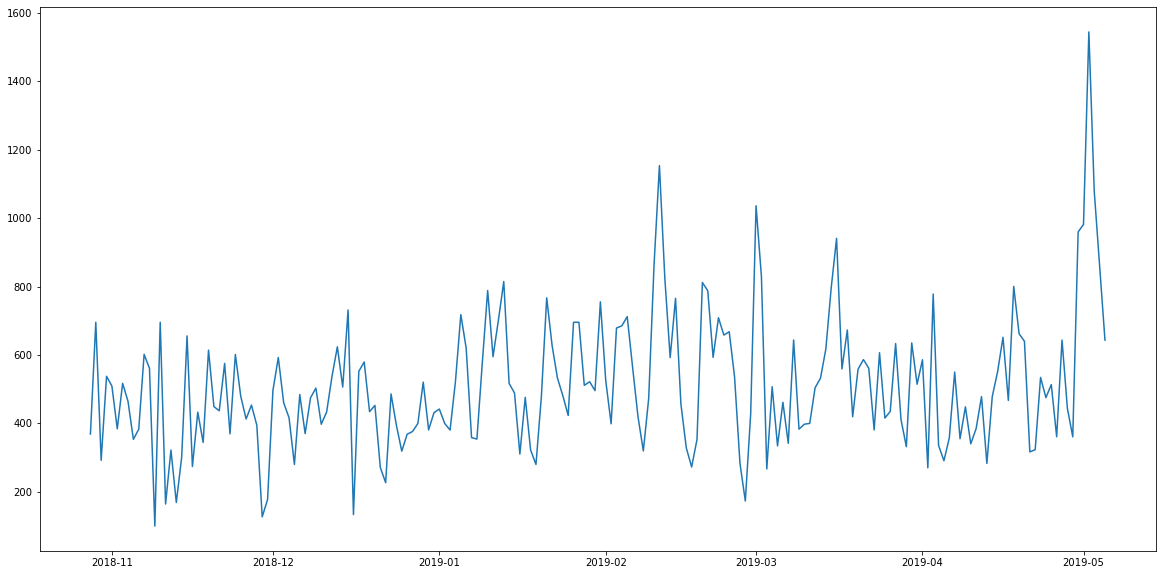

In [353]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(tr[-90-400:-300])

In [348]:
tr[-90:]

Datetime
2019-12-02 00:00:00+00:00    304.799624
2019-12-03 00:00:00+00:00    462.711352
2019-12-04 00:00:00+00:00    695.301858
2019-12-05 00:00:00+00:00    241.770242
2019-12-06 00:00:00+00:00     36.264019
                                ...    
2020-02-25 00:00:00+00:00    516.014263
2020-02-26 00:00:00+00:00    470.661244
2020-02-27 00:00:00+00:00    541.003574
2020-02-28 00:00:00+00:00    634.866140
2020-02-29 00:00:00+00:00    532.321773
Freq: D, Name: ActivePower, Length: 90, dtype: float64

In [354]:
def plotMovingAverage(series, window, plot_actual=False, scale=1.96):

    rolling_mean = series.rolling(window=window,center=True).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    if plot_actual:
        plt.plot(series[window:], label="Actual values", color='#878a88', alpha=0.5)
        
    plt.legend(loc="upper left") 
    plt.grid(True)

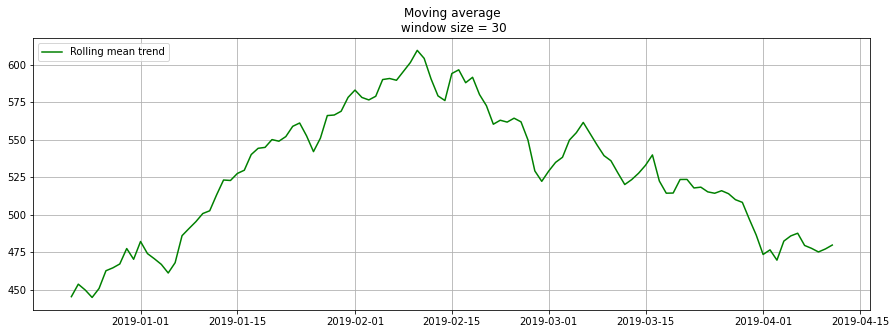

In [393]:
plotMovingAverage(tr[-90-360:-310], 30, plot_actual=False, scale=1.96)

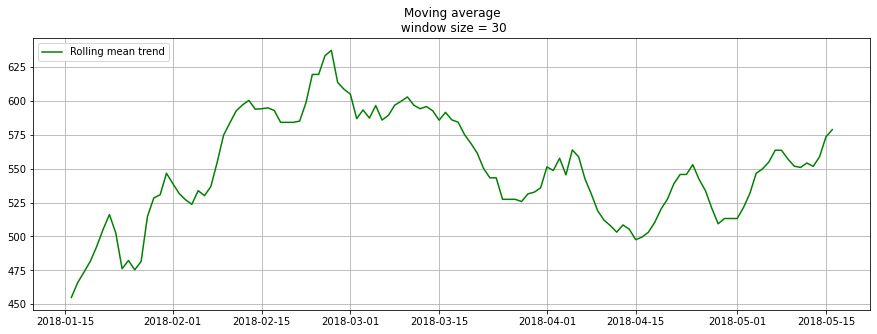

In [388]:
plotMovingAverage(tr[:150], 30, plot_actual=False, scale=1.96)

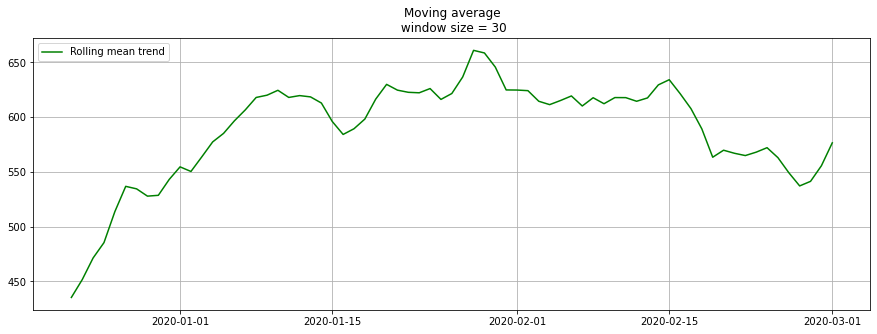

In [461]:
plotMovingAverage(davg_df2['ActivePower'][-100:], 30, plot_actual=False, scale=1.96)

In [407]:
linear = pd.DataFrame()

In [413]:
linear['date'] = np.array(range(len(linear)))

In [414]:
linear['value'] = tr.values

In [415]:
linear

,date,value
0,0,366.223561
1,1,462.550740
2,2,454.417752
3,3,369.952190
4,4,319.446595
...,...,...
785,785,516.014263
786,786,470.661244
787,787,541.003574
788,788,634.866140


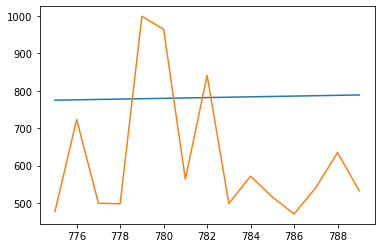

In [422]:
plt.plot(linear[-15:])

In [419]:
import statsmodels.formula.api as smf

model = smf.ols('value ~ date', linear[-18:]).fit()
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.6469
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.433
Time:                        23:14:06   Log-Likelihood:                -120.21
No. Observations:                  18   AIC:                             244.4
Df Residuals:                      16   BIC:                             246.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5242.9544   7234.568     -0.725      0.479   -2.06e+04    1.01e+04
date           7.4548      9.269      0.804      0.433     -12.194      27.104
==============================================================================
Omnibus:                        4.040   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                2.187
Skew:                           0.827   Prob(JB):                        0.335
Kurtosis:                       3.429   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

366.2235614316243

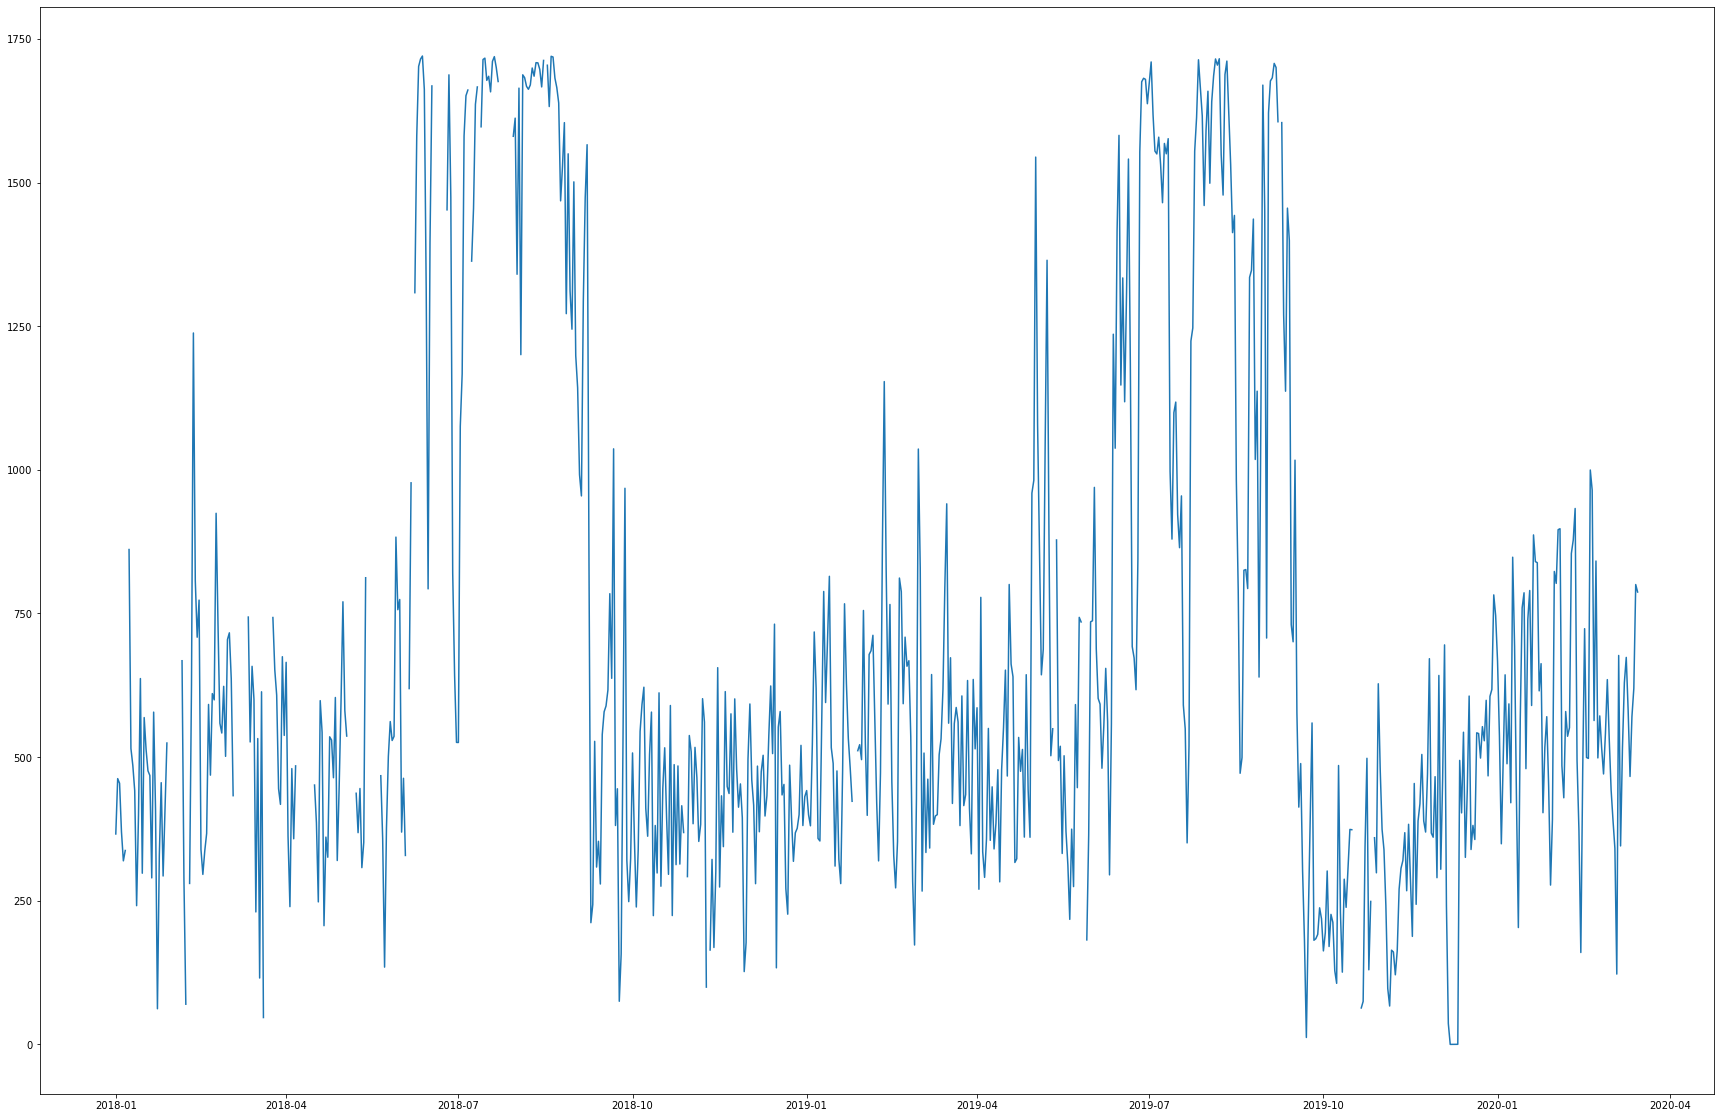

In [507]:
fig, ax = plt.subplots(figsize=(30,20))
ax.plot(full)
plt.savefig('xxxx.png')

In [638]:
full

Datetime
2018-01-01 00:00:00+00:00    366.223561
2018-01-02 00:00:00+00:00    462.550740
2018-01-03 00:00:00+00:00    454.417752
2018-01-04 00:00:00+00:00    369.952190
2018-01-05 00:00:00+00:00    319.446595
                                ...    
2020-03-11 00:00:00+00:00    466.289248
2020-03-12 00:00:00+00:00    570.315539
2020-03-13 00:00:00+00:00    619.637333
2020-03-14 00:00:00+00:00    800.312824
2020-03-15 00:00:00+00:00    787.305117
Freq: D, Name: ActivePower, Length: 805, dtype: float64